In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd

In [3]:
superhero = pd.read_csv('superheroes_power_matrix.csv')

In [4]:
superhero.head()

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
superhero.shape

(667, 168)

In [6]:
superhero.dtypes

Name                     object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
Cold Resistance            bool
Durability                 bool
Stealth                    bool
Energy Absorption          bool
Flight                     bool
Danger Sense               bool
Underwater breathing       bool
Marksmanship               bool
Weapons Master             bool
Power Augmentation         bool
Animal Attributes          bool
Longevity                  bool
Intelligence               bool
Super Strength             bool
Cryokinesis                bool
Telepathy                  bool
Energy Armor               bool
Energy Blasts              bool
Duplication                bool
Size Changing              bool
Density Control            bool
Stamina                    bool
Astral Travel              bool
Audio Control              bool
Dexterity                  bool
                          ...  
Intuitiv

In [7]:
import requests
from bs4 import BeautifulSoup
s = requests.Session()
r = s.get('https://www.imdb.com/list/ls066620113/')
screen= BeautifulSoup(r.content, "html.parser")

In [8]:
tags =screen.find_all('div', {'class':'list-description'})

In [9]:
a_tag = tags[19]
a_tag

<div class="list-description"><p>Thanos &lt;31&gt;
Gamora &lt;20&gt;
Tony Stark / Iron Man &lt;17&gt;
Thor &lt;15:15&gt;
Dr. Stephen Strange &lt;11:15&gt;
Peter Quill / Star-Lord &lt;10:15&gt;
Vision &lt;10&gt;
Dr. Bruce Banner / The Hulk &lt;9:30&gt;
Wanda Maximoff / Scarlet Witch &lt;9&gt;
Peter Parker / Spider-Man &lt;7:15&gt;
Steve Rogers &lt;7:15&gt;
Rocket &lt;6:15&gt;
Drax &lt;5:45&gt;
Mantis &lt;5:45&gt;
Natasha Romanoff / Black Widow &lt;5&gt;
Ebony Maw &lt;4:30&gt;
Groot II &lt;4&gt;
Proxima Midnight &lt;4&gt;
Loki &lt;3:45&gt;
King T'Challa / Black Panther &lt;3:30&gt;
Wong &lt;3:30&gt;
Cull Obsidian &lt;3:30&gt;
Corvus Glaive &lt;3:15&gt;
Nebula &lt;3:15&gt;
Col. James "Rhodey" Rhodes / War Machine &lt;2:45&gt;
Sam Wilson / Falcon &lt;2:45&gt;
Okoye &lt;2:45&gt;
Eitri &lt;2:45&gt;
James "Bucky" Barnes / White Wolf &lt;2&gt;
The Stonekeeper &lt;1:45&gt;
Pepper Potts &lt;1:30&gt;
M'Baku &lt;1&gt;
Secretary Thaddeus Ross &lt;1&gt;
Nick Fury &lt;1&gt;
Maria Hill &lt;:45&gt;
Pri

In [10]:
def create_df(tag):
    text = tag.get_text()
    split = text.split('\n')
    dic = {word.split('<')[0]: word.split('<')[1].replace('>', '') for word in split}
    avenger_df = pd.DataFrame.from_dict(dic.items())
    avenger_df.columns = ['Name', 'screen_time']
    return avenger_df


In [11]:
avenger1_tag = tags[6]
avenger1_df = create_df(avenger1_tag)
avenger1_df['movie'] = 'Avenger 1'
avenger1_df.head()

,Name,screen_time,movie
0,Tony Stark / Iron Man,31:45,Avenger 1
1,Steve Rogers / Captain America,28:15,Avenger 1
2,Agent Natasha Romanoff / Black Widow,24:45,Avenger 1
3,Dr. Bruce Banner / The Hulk,21:45,Avenger 1
4,Loki,21:30,Avenger 1


In [12]:
avenger1_df.shape

(19, 3)

In [13]:
avenger2_tag = tags[11]
avenger2_df = create_df(avenger2_tag)
avenger2_df['movie'] = 'Avenger 2'
avenger2_df.head()

,Name,screen_time,movie
0,Tony Stark / Iron Man,27:15,Avenger 2
1,Steve Rogers / Captain America,21:45,Avenger 2
2,Dr. Bruce Banner / The Hulk,20,Avenger 2
3,Natasha Romanoff / Black Widow,18,Avenger 2
4,Ultron,17,Avenger 2


In [14]:
avenger2_df.shape

(31, 3)

In [15]:
avenger3_tag = tags[19]
avenger3_df = create_df(avenger3_tag)
avenger3_df['movie'] = 'Avenger 3'
avenger3_df.head()

,Name,screen_time,movie
0,Thanos,31,Avenger 3
1,Gamora,20,Avenger 3
2,Tony Stark / Iron Man,17,Avenger 3
3,Thor,15:15,Avenger 3
4,Dr. Stephen Strange,11:15,Avenger 3


In [16]:
avenger3_df.shape

(42, 3)

In [17]:
avengers_combined = pd.concat([avenger1_df, avenger2_df, avenger3_df])
avengers_combined.head()

,Name,screen_time,movie
0,Tony Stark / Iron Man,31:45,Avenger 1
1,Steve Rogers / Captain America,28:15,Avenger 1
2,Agent Natasha Romanoff / Black Widow,24:45,Avenger 1
3,Dr. Bruce Banner / The Hulk,21:45,Avenger 1
4,Loki,21:30,Avenger 1


In [18]:
avengers_combined['minutes']= [time.split(':')[0] for time in avengers_combined.screen_time]
avengers_combined['seconds']= [time.split(':')[1] if ":" in time else '0' for time in avengers_combined.screen_time]
avengers_combined['Name']= [name.split('/')[1] if "/" in name else name for name in avengers_combined.Name]
avengers_combined.head()


,Name,screen_time,movie,minutes,seconds
0,Iron Man,31:45,Avenger 1,31,45
1,Captain America,28:15,Avenger 1,28,15
2,Black Widow,24:45,Avenger 1,24,45
3,The Hulk,21:45,Avenger 1,21,45
4,Loki,21:30,Avenger 1,21,30


In [19]:
avengers_combined.minutes = [int(num) if num not in ['x', 'v', ''] else 0 for num in avengers_combined.minutes]
avengers_combined.seconds = [int(num) if num not in ['x', 'v', ''] else 0 for num in avengers_combined.seconds]
avengers_combined.dtypes


Name           object
screen_time    object
movie          object
minutes         int64
seconds         int64
dtype: object

In [20]:
avengers_all = avengers_combined.groupby('Name').sum().reset_index()


In [21]:
top_10 = avengers_all.sort_values(by = "minutes",ascending = False)[0:10]

In [22]:
top_10

,Name,minutes,seconds
5,Iron Man,75,60
11,The Hulk,50,75
2,Captain America,49,60
1,Black Widow,47,45
63,Thor,46,30
60,Thanos,31,30
4,Hawkeye,27,45
43,Loki,24,75
7,Scarlet Witch,21,0
36,Gamora,20,0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x = "Name" , y = "minutes",data = top_10)
plt.rcParams.update({'font.size': 17})
plt.xticks(rotation=30)
plt.savefig("Barplot.png")

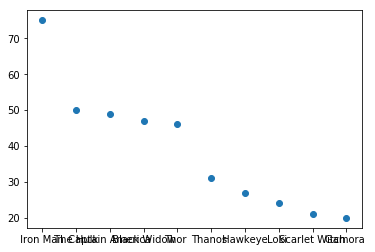

In [24]:
plt.scatter(x= top_10.Name, y=top_10.minutes )

In [25]:
avengers_all.columns


Index(['Name', 'minutes', 'seconds'], dtype='object')

In [26]:
superhero

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
combined = pd.concat([avengers_all, superhero], axis = 1)
combined.head()

,Name,minutes,seconds,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Black Panther,3.0,30.0,3-D Man,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Black Widow,47.0,45.0,A-Bomb,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Captain America,49.0,60.0,Abe Sapien,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Falcon,2.0,90.0,Abin Sur,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Hawkeye,27.0,45.0,Abomination,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
avengers_names = [x.strip() for x in set(avengers_all["Name"])]
avengers_names

['Sally Avril',
 'Corvus Glaive',
 'Black Panther',
 'Iron Man',
 'J.A.R.V.I.S.',
 'Drax',
 'Madame B',
 'Spider-Man',
 'Agent Jasper Sitwell',
 'Dr. Stephen Strange',
 'Eitri',
 'Cindy Moon',
 'Okoye',
 'Steve Rogers',
 'Cameron Klein',
 'Dr. List',
 'Gamora',
 'Black Widow',
 'Dr. Erik Selvig',
 'Vision',
 'Quicksilver',
 'Ultron',
 'F.R.I.D.A.Y.',
 'Agent Maria Hill',
 'Agent Phil Coulson',
 'Wong',
 'Cull Obsidian',
 'Councilwoman Hawley',
 'Peggy Carter',
 'Scarlet Witch',
 'Secretary Thaddeus Ross',
 'Mantis',
 'Nebula',
 'The Other',
 'Pepper Potts',
 'Baron Wolfgang von Strucker',
 'The Stonekeeper',
 'Star-Lord',
 'Nick Fury',
 'The Hulk',
 'Councilman Gideon Malick',
 'The Collector',
 'Cooper Barton',
 'White Wolf',
 'Laura Barton',
 'Gen. Georgi Luchkov',
 'Hawkeye',
 'Falcon',
 'Captain America',
 'Ebony Maw',
 'Heimdall',
 'Thanos',
 'Princess Shuri',
 'Ulysses Klauë',
 'Groot II',
 'Maria Hill',
 'Ayo',
 "M'Baku",
 'War Machine',
 'Costel',
 'Dr. Helen Cho',
 'Proxima Mi

In [29]:
common_heros = [x for x in superhero["Name"].values if x.strip() in avengers_names]
common_heros

['Black Panther',
 'Black Widow',
 'Captain America',
 'Falcon',
 'Gamora',
 'Hawkeye',
 'Iron Man',
 'Loki',
 'Mantis',
 'Nebula',
 'Nick Fury',
 'Quicksilver',
 'Scarlet Witch',
 'Spider-Man',
 'Star-Lord',
 'Thanos',
 'Thor',
 'Ultron',
 'Vision',
 'War Machine']

In [30]:
avengers_all["Name"] = avengers_all["Name"].apply(lambda x:x.strip())
df1 = avengers_all.loc[avengers_all['Name'].isin(common_heros)]
df2 = superhero.loc[superhero['Name'].isin(common_heros)]

In [31]:
df1.shape

(20, 3)

In [32]:
df2.shape

(20, 168)

In [41]:
merged_20  = pd.merge(df1,df2,on ="Name")
merged_20.to_csv("Avengers_superhero_powers.csv")

In [34]:
merged_20["Power_Counts"] = merged_20.iloc[:,-165:-1].sum(axis = 1)


In [35]:
merged_20

,Name,minutes,seconds,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power_Counts
0,Black Panther,3,30,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,12
1,Black Widow,47,45,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,8
2,Captain America,49,60,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,9
3,Falcon,2,90,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
4,Hawkeye,27,45,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,5
5,Iron Man,75,60,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,20
6,Quicksilver,10,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,5
7,Scarlet Witch,21,0,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,13
8,Spider-Man,7,15,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,18
9,Star-Lord,10,15,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,7


In [36]:
final_df = merged_20[["Name","minutes","Power_Counts"]]
final_df.sort_values(by = 'minutes', ascending= False)



,Name,minutes,Power_Counts
5,Iron Man,75,20
2,Captain America,49,9
1,Black Widow,47,8
17,Thor,46,16
16,Thanos,31,29
4,Hawkeye,27,5
12,Loki,24,13
7,Scarlet Witch,21,13
11,Gamora,20,11
18,Ultron,17,24


In [37]:
power_df = final_df.sort_values(by ='Power_Counts', ascending = False)
power_df = power_df[0:10]

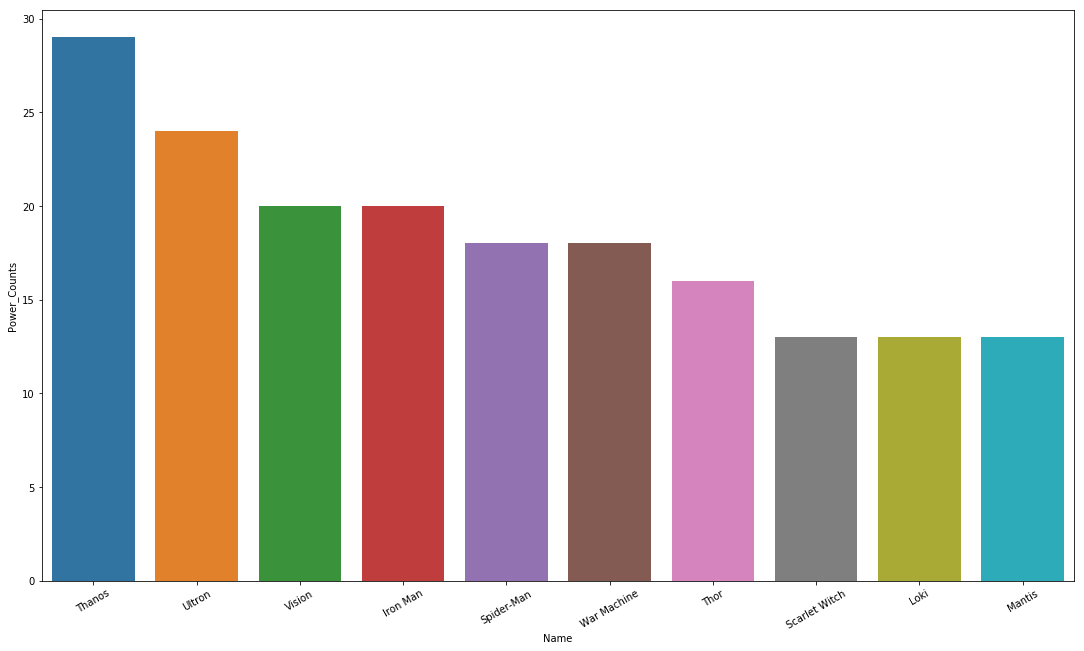

In [38]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x = "Name" , y = "Power_Counts",data = power_df)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=30)
plt.savefig("Power_Barplot.png")

In [39]:
power_df['power_counts'] = power_df.Power_Counts * 500
power_df[['Name', 'Power_Counts']]


,Name,Power_Counts
16,Thanos,29
18,Ultron,24
19,Vision,20
5,Iron Man,20
8,Spider-Man,18
10,War Machine,18
17,Thor,16
7,Scarlet Witch,13
12,Loki,13
13,Mantis,13


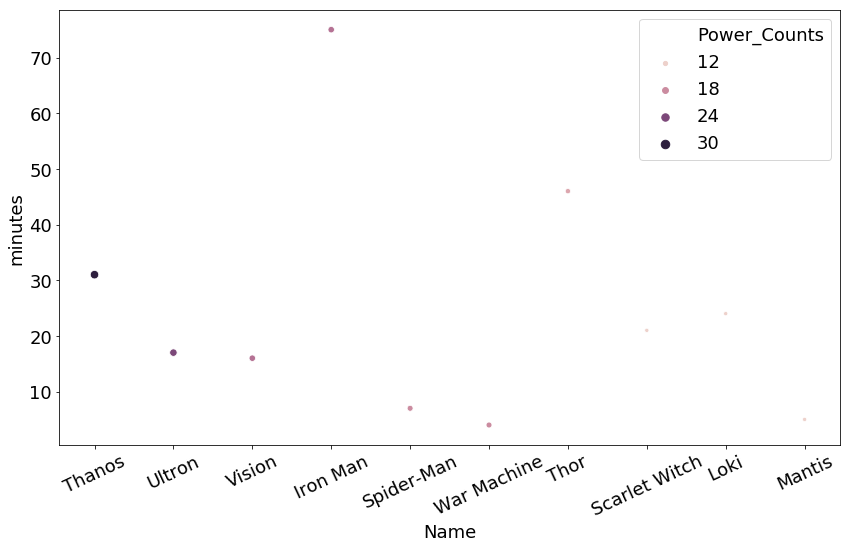

In [40]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
sns.scatterplot(data = power_df,x = "Name",y = "minutes",hue = "Power_Counts", size = 'Power_Counts')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=25)
plt.savefig("Power count and Name with minutes.png")
